In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

df = pd.read_csv('/content/CUSTOMER_ANALYTICS_Telecom_churn.csv')

print(df.info())
sns.set(style='whitegrid')
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [156]:
print("Numerical Summary:\n")
df.describe()

Numerical Summary:



SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

from matplotlib import pyplot as plt
_df_35['SeniorCitizen'].plot(kind='hist', bins=20, title='SeniorCitizen')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_36['tenure'].plot(kind='hist', bins=20, title='tenure')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_37['MonthlyCharges'].plot(kind='hist', bins=20, title='MonthlyCharges')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_38.plot(kind='scatter', x='SeniorCitizen', y='tenure', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_39.plot(kind='scatter', x='tenure', y='MonthlyCharges', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_40['SeniorCitizen'].plot(kind='line', figsize=(8, 4), title='SeniorCitizen')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_41['tenure'].plot(kind='line', figsize=(8, 4), title='tenure')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_42['MonthlyCharges'].plot(kind='line', figsize=(8, 4), title='MonthlyCharges')
plt.gca().spines[['top', 'right']].set_visible(False)

In [157]:
print("Categorical Summary:\n")
df.describe(include="object")

Categorical Summary:



customerID gender Partner Dependents PhoneService MultipleLines  \
count         7043   7043    7043       7043         7043          7043   
unique        7043      2       2          2            2             3   
top     7590-VHVEG   Male      No         No          Yes            No   
freq             1   3555    3641       4933         6361          3390   

       InternetService OnlineSecurity OnlineBackup DeviceProtection  \
count             7043           7043         7043             7043   
unique               3              3            3                3   
top        Fiber optic             No           No               No   
freq              3096           3498         3088             3095   

       TechSupport StreamingTV StreamingMovies        Contract  \
count         7043        7043            7043            7043   
unique           3           3               3               3   
top             No          No              No  Month-to-month   
freq          3473        2810            2785            3875   

       PaperlessBilling     PaymentMethod TotalCharges Churn  
count              7043              7043         7043  7043  
unique                2                 4         6531     2  
top                 Yes  Electronic check                 No  
freq               4171              2365           11  5174

In [158]:
print("Missing Values Before Cleaning:")
print(df.isna().sum())

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

mask = df['TotalCharges'].isna() & (df['tenure'] > 0)
df.loc[mask, 'TotalCharges'] = df.loc[mask, 'MonthlyCharges'] * df.loc[mask, 'tenure']

df.loc[df['tenure'] == 0, 'TotalCharges'] = df.loc[df['tenure'] == 0, 'TotalCharges'].fillna(0)

df = df.dropna(subset=['TotalCharges', 'tenure', 'MonthlyCharges'])

print("\nDuplicate customerIDs Before Cleaning:", df['customerID'].duplicated().sum())
df = df.drop_duplicates(subset=['customerID'], keep='first')


df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0, 1: 1, 0: 0})
df['SeniorCitizen'] = df['SeniorCitizen'].astype(int)

categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                    'PaperlessBilling', 'PaymentMethod']
for col in categorical_cols:
    df[col] = df[col].astype('category')

inconsistent = df[(df['tenure'] == 0) & (df['TotalCharges'] > 0)]
if not inconsistent.empty:
    print("\nInconsistent Rows (tenure = 0, TotalCharges > 0):", len(inconsistent))
    df.loc[df['tenure'] == 0, 'TotalCharges'] = 0

print("\nMissing Values After Cleaning:")
print(df.isna().sum())
print("\nData Types After Cleaning:")
print(df.dtypes)
print("\nDataset Shape After Cleaning:", df.shape)

Missing Values Before Cleaning:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Duplicate customerIDs Before Cleaning: 0

Missing Values After Cleaning:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
T

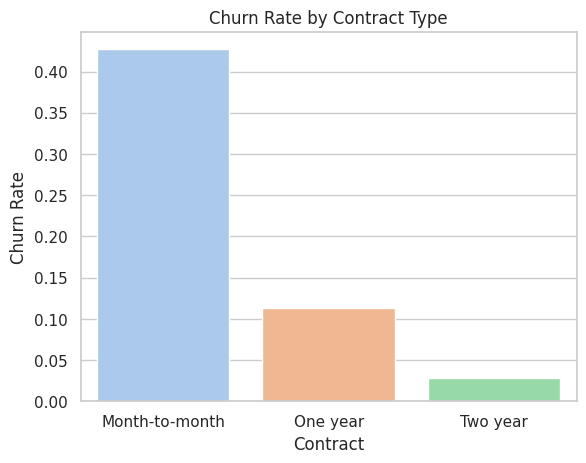

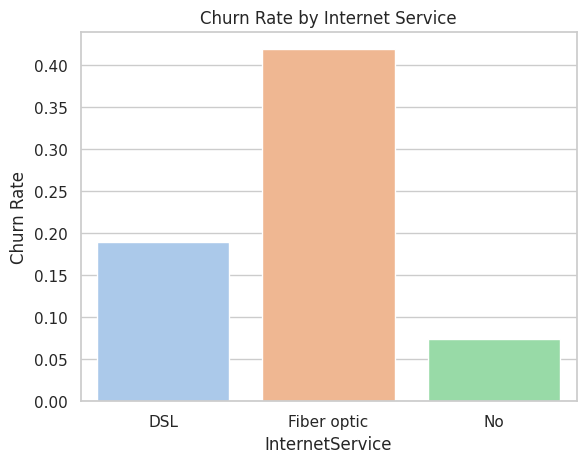

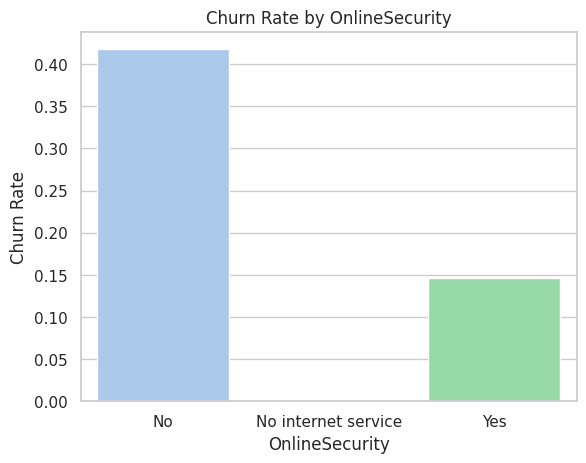

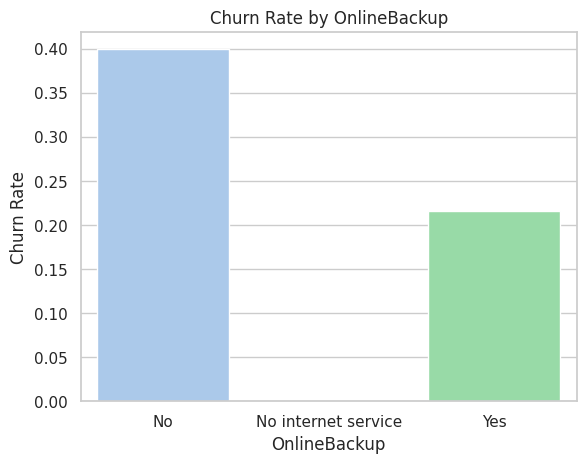

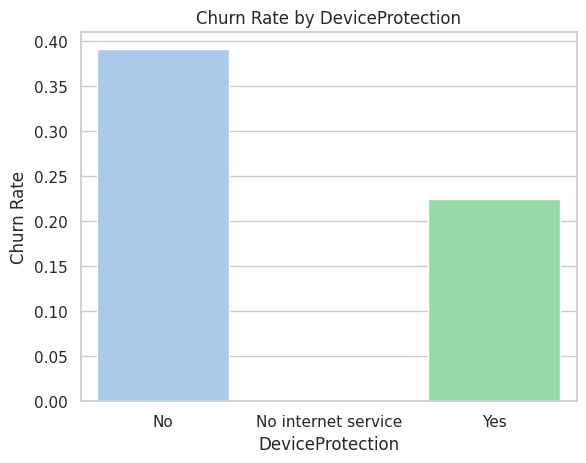

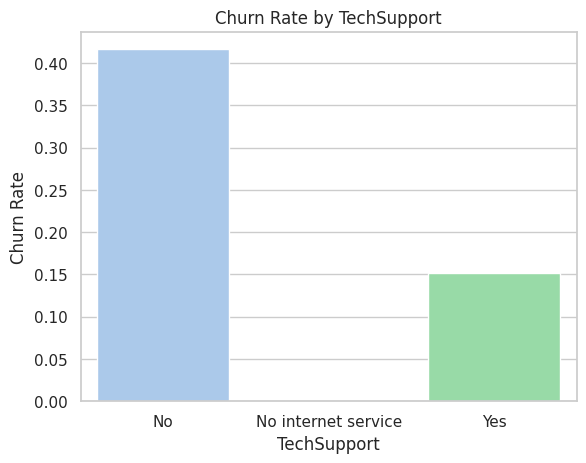

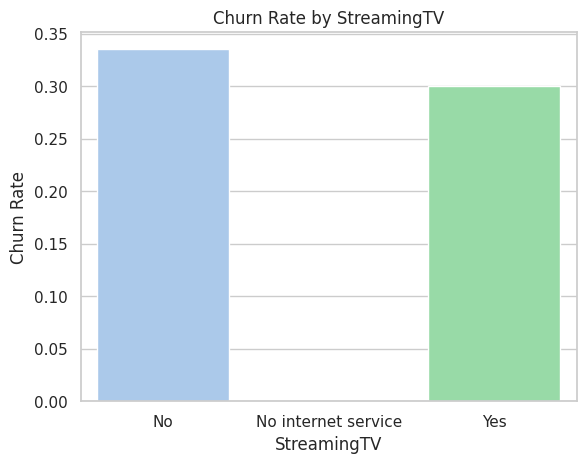

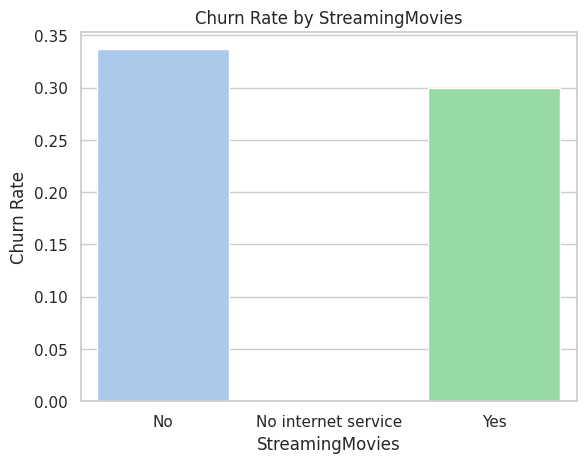

In [159]:
contract_churn = df.groupby('Contract')['Churn'].mean()
sns.barplot(x=contract_churn.index, y=contract_churn.values, palette='pastel')
plt.title('Churn Rate by Contract Type')
plt.ylabel('Churn Rate')
plt.show()

internet_churn = df.groupby('InternetService')['Churn'].mean()
sns.barplot(x=internet_churn.index, y=internet_churn.values, palette='pastel')
plt.title('Churn Rate by Internet Service')
plt.ylabel('Churn Rate')
plt.show()

addon_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
internet_customers = df[df['InternetService'] != 'No']
for service in addon_services:
    service_churn = internet_customers.groupby(service)['Churn'].mean()
    sns.barplot(x=service_churn.index, y=service_churn.values, palette='pastel')
    plt.title(f'Churn Rate by {service}')
    plt.ylabel('Churn Rate')
    plt.show()

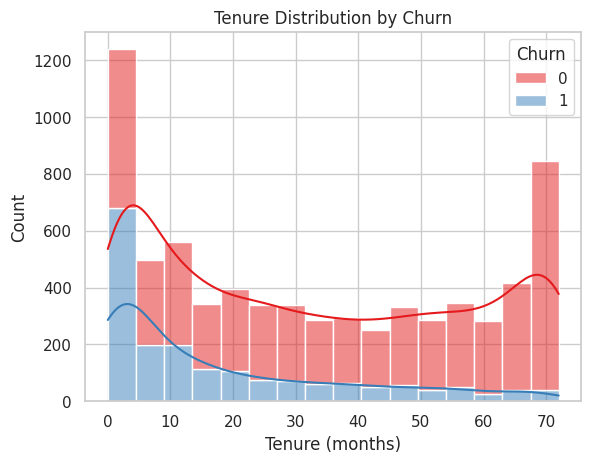

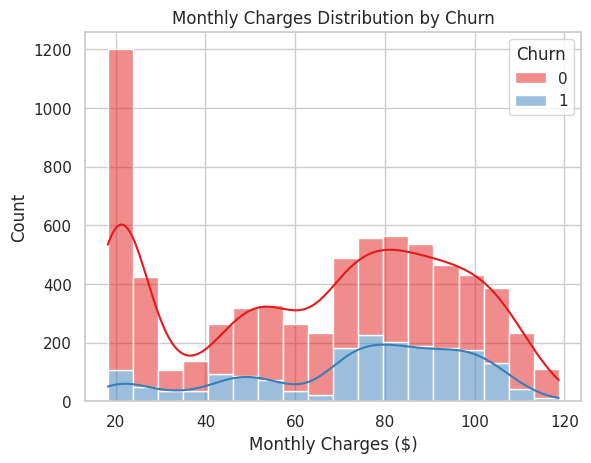

In [160]:
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', kde=True, palette='Set1')
plt.title('Tenure Distribution by Churn')
plt.xlabel('Tenure (months)')
plt.show()

sns.histplot(data=df, x='MonthlyCharges', hue='Churn', multiple='stack', kde=True, palette='Set1')
plt.title('Monthly Charges Distribution by Churn')
plt.xlabel('Monthly Charges ($)')
plt.show()

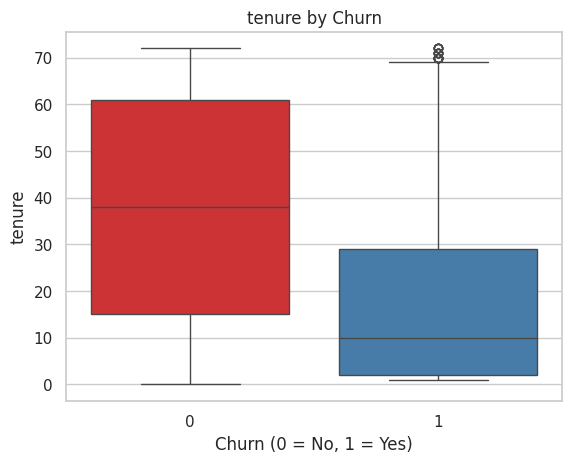

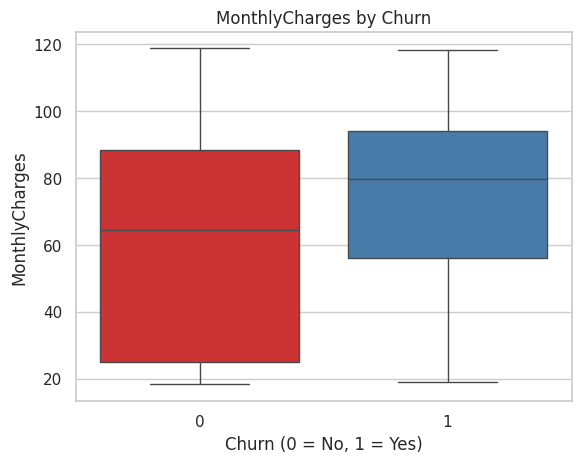

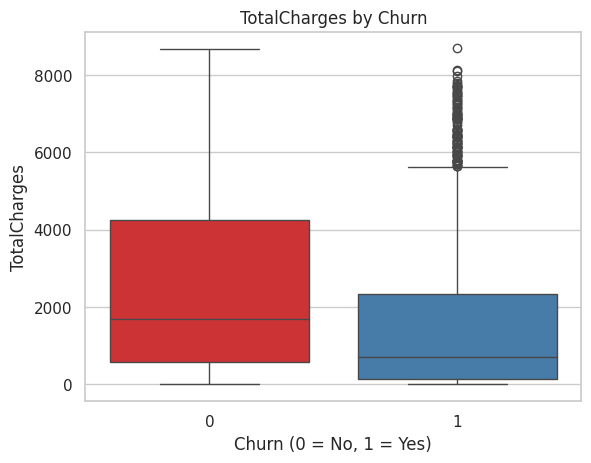

In [161]:
for feature in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    sns.boxplot(x='Churn', y=feature, data=df, palette='Set1')
    plt.title(f'{feature} by Churn')
    plt.xlabel('Churn (0 = No, 1 = Yes)')
    plt.ylabel(feature)
    plt.show()

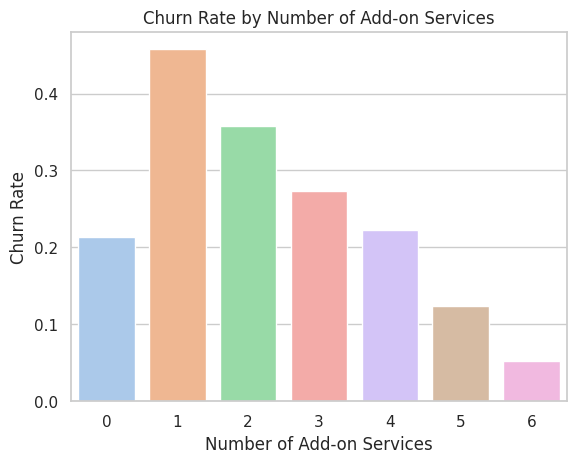

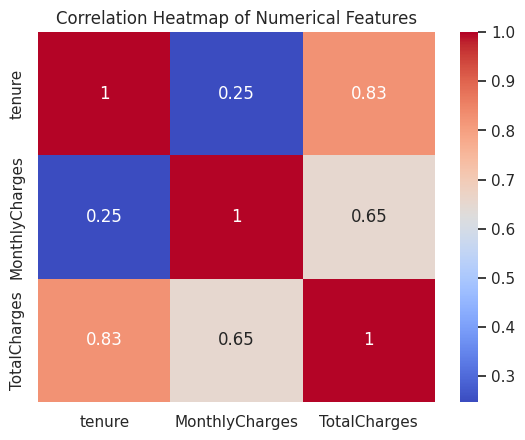

In [162]:
addon_columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df['NumAddons'] = df[addon_columns].apply(lambda x: (x == 'Yes').sum(), axis=1)

addon_churn = df.groupby('NumAddons')['Churn'].mean()
sns.barplot(x=addon_churn.index, y=addon_churn.values, palette='pastel')
plt.title('Churn Rate by Number of Add-on Services')
plt.xlabel('Number of Add-on Services')
plt.ylabel('Churn Rate')
plt.show()


df['TotalCharges'] = df['TotalCharges'].astype(str)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'].str.strip(), errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
corr = df[numerical_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

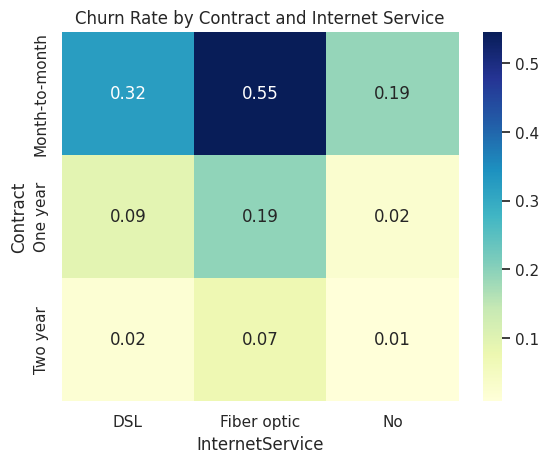

In [124]:
contract_internet_churn = pd.crosstab(index=df['Contract'], columns=df['InternetService'], values=df['Churn'], aggfunc='mean')
sns.heatmap(contract_internet_churn, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Churn Rate by Contract and Internet Service')
plt.show()

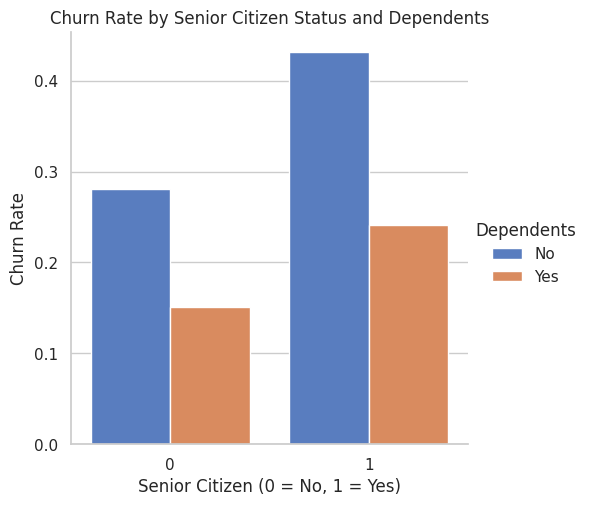

In [125]:
demo_churn = df.groupby(['SeniorCitizen', 'Dependents'])['Churn'].mean().reset_index()
sns.catplot(x='SeniorCitizen', y='Churn', hue='Dependents', kind='bar', data=demo_churn, palette='muted')
plt.title('Churn Rate by Senior Citizen Status and Dependents')
plt.xlabel('Senior Citizen (0 = No, 1 = Yes)')
plt.ylabel('Churn Rate')
plt.show()

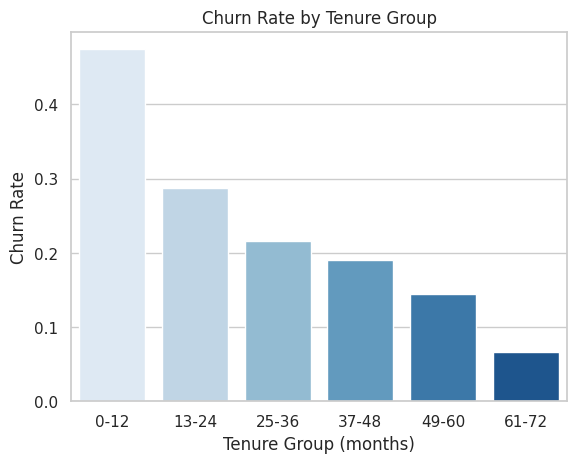

In [126]:
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ['0-12', '13-24', '25-36', '37-48', '49-60', '61-72']
df['TenureGroup'] = pd.cut(df['tenure'], bins=bins, labels=labels, include_lowest=True)

tenure_churn = df.groupby('TenureGroup')['Churn'].mean()
sns.barplot(x=tenure_churn.index, y=tenure_churn.values, palette='Blues')
plt.title('Churn Rate by Tenure Group')
plt.xlabel('Tenure Group (months)')
plt.ylabel('Churn Rate')
plt.show()

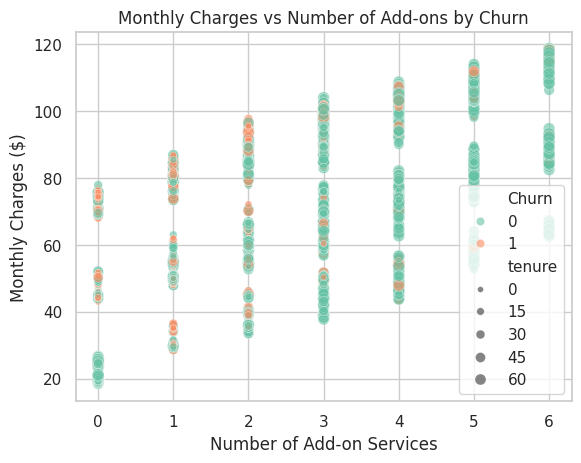

In [127]:
sns.scatterplot(x='NumAddons', y='MonthlyCharges', hue='Churn', size='tenure', data=df, alpha=0.6, palette='Set2')
plt.title('Monthly Charges vs Number of Add-ons by Churn')
plt.xlabel('Number of Add-on Services')
plt.ylabel('Monthly Charges ($)')
plt.show()

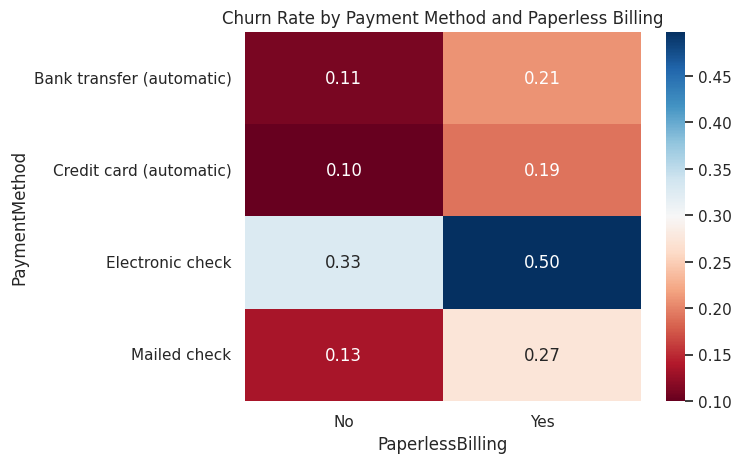

In [128]:
payment_paperless_churn = pd.crosstab(index=df['PaymentMethod'], columns=df['PaperlessBilling'], values=df['Churn'], aggfunc='mean')
sns.heatmap(payment_paperless_churn, annot=True, cmap='RdBu', fmt='.2f')
plt.title('Churn Rate by Payment Method and Paperless Billing')
plt.show()

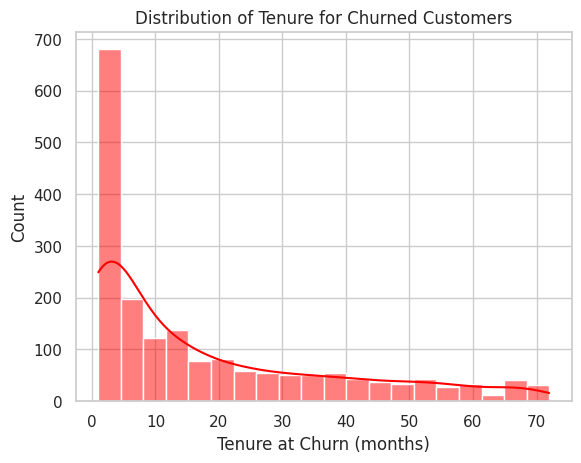

In [129]:
sns.histplot(data=df[df['Churn'] == 1], x='tenure', bins=20, color='red', kde=True)
plt.title('Distribution of Tenure for Churned Customers')
plt.xlabel('Tenure at Churn (months)')
plt.show()

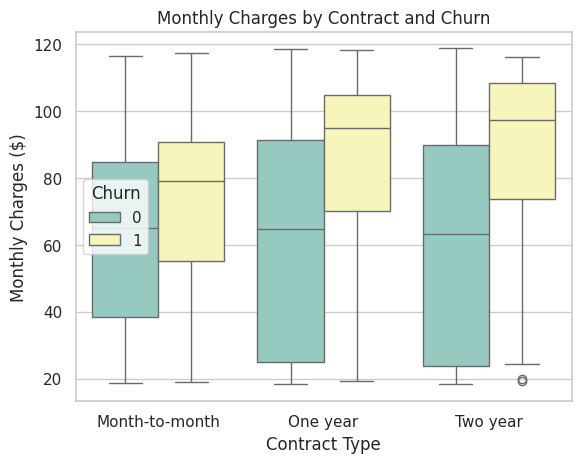

In [130]:
sns.boxplot(x='Contract', y='MonthlyCharges', hue='Churn', data=df, palette='Set3')
plt.title('Monthly Charges by Contract and Churn')
plt.xlabel('Contract Type')
plt.ylabel('Monthly Charges ($)')
plt.show()

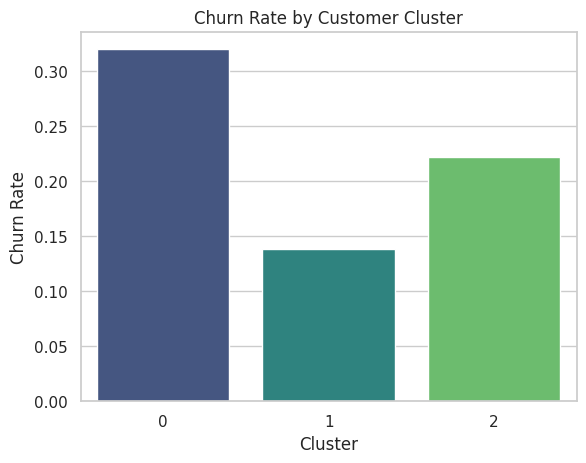

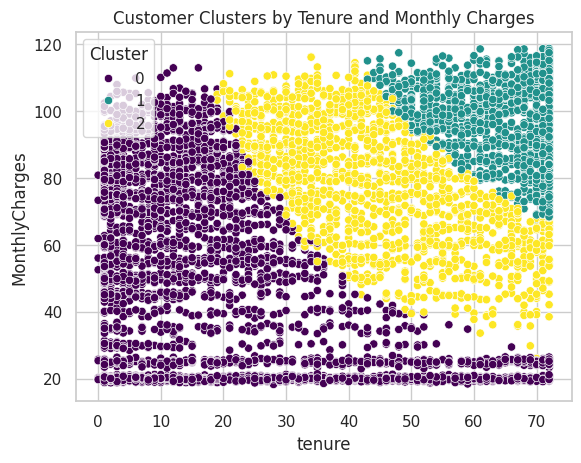

In [131]:
cluster_data = df[['tenure', 'MonthlyCharges', 'TotalCharges']].dropna()
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_data['Cluster'] = kmeans.fit_predict(cluster_data)

df_clusters = df.merge(cluster_data[['Cluster']], left_index=True, right_index=True, how='left')

cluster_churn = df_clusters.groupby('Cluster')['Churn'].mean()
sns.barplot(x=cluster_churn.index, y=cluster_churn.values, palette='viridis')
plt.title('Churn Rate by Customer Cluster')
plt.xlabel('Cluster')
plt.ylabel('Churn Rate')
plt.show()

sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Cluster', data=df_clusters, palette='viridis')
plt.title('Customer Clusters by Tenure and Monthly Charges')
plt.show()

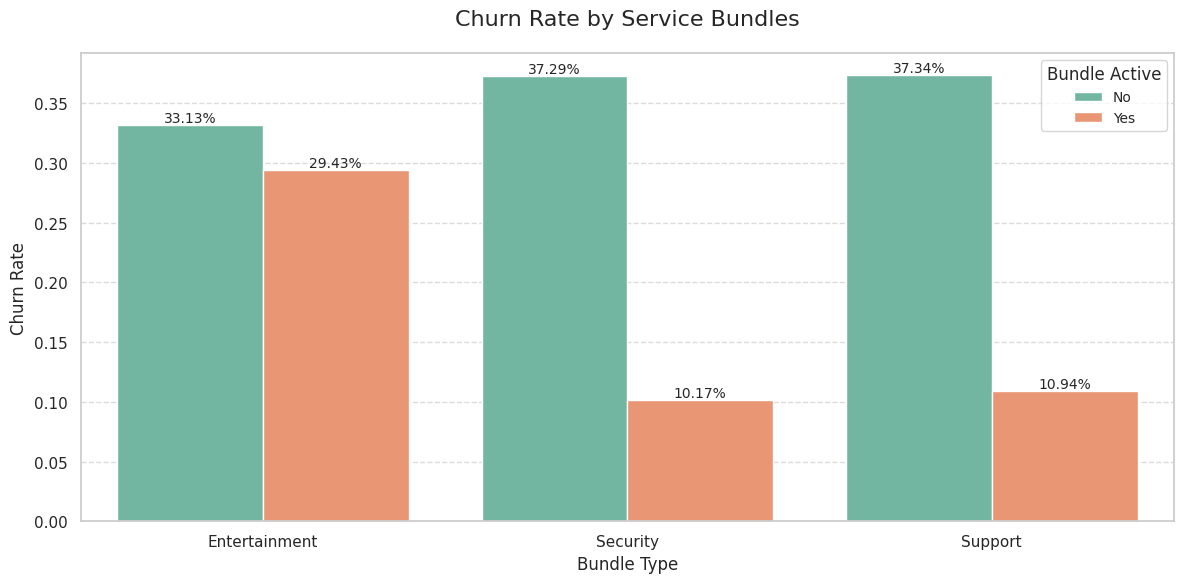

In [133]:
internet_df = df[df['InternetService'] != 'No'].copy()
internet_df['EntertainmentBundle'] = ((internet_df['StreamingTV'] == 'Yes') & (internet_df['StreamingMovies'] == 'Yes')).astype(int)
internet_df['SecurityBundle'] = ((internet_df['OnlineSecurity'] == 'Yes') & (internet_df['DeviceProtection'] == 'Yes')).astype(int)
internet_df['SupportBundle'] = ((internet_df['TechSupport'] == 'Yes') & (internet_df['OnlineBackup'] == 'Yes')).astype(int)

bundle_churn = {
    'Entertainment': internet_df.groupby('EntertainmentBundle')['Churn'].mean(),
    'Security': internet_df.groupby('SecurityBundle')['Churn'].mean(),
    'Support': internet_df.groupby('SupportBundle')['Churn'].mean()
}

data_to_plot = pd.DataFrame({
    'Bundle Type': ['Entertainment', 'Entertainment', 'Security', 'Security', 'Support', 'Support'],
    'Bundle Active': ['No', 'Yes', 'No', 'Yes', 'No', 'Yes'],
    'Churn Rate': [
        bundle_churn['Entertainment'][0], bundle_churn['Entertainment'][1],
        bundle_churn['Security'][0], bundle_churn['Security'][1],
        bundle_churn['Support'][0], bundle_churn['Support'][1]
    ]
})

plt.figure(figsize=(12, 6))
sns.barplot(x='Bundle Type', y='Churn Rate', hue='Bundle Active', data=data_to_plot, palette='Set2')

plt.title('Churn Rate by Service Bundles', fontsize=16, pad=20)
plt.xlabel('Bundle Type', fontsize=12)
plt.ylabel('Churn Rate', fontsize=12)
plt.legend(title='Bundle Active', title_fontsize=12, fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:
        plt.gca().annotate(f'{height:.2%}', (p.get_x() + p.get_width() / 2., height),
                           ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

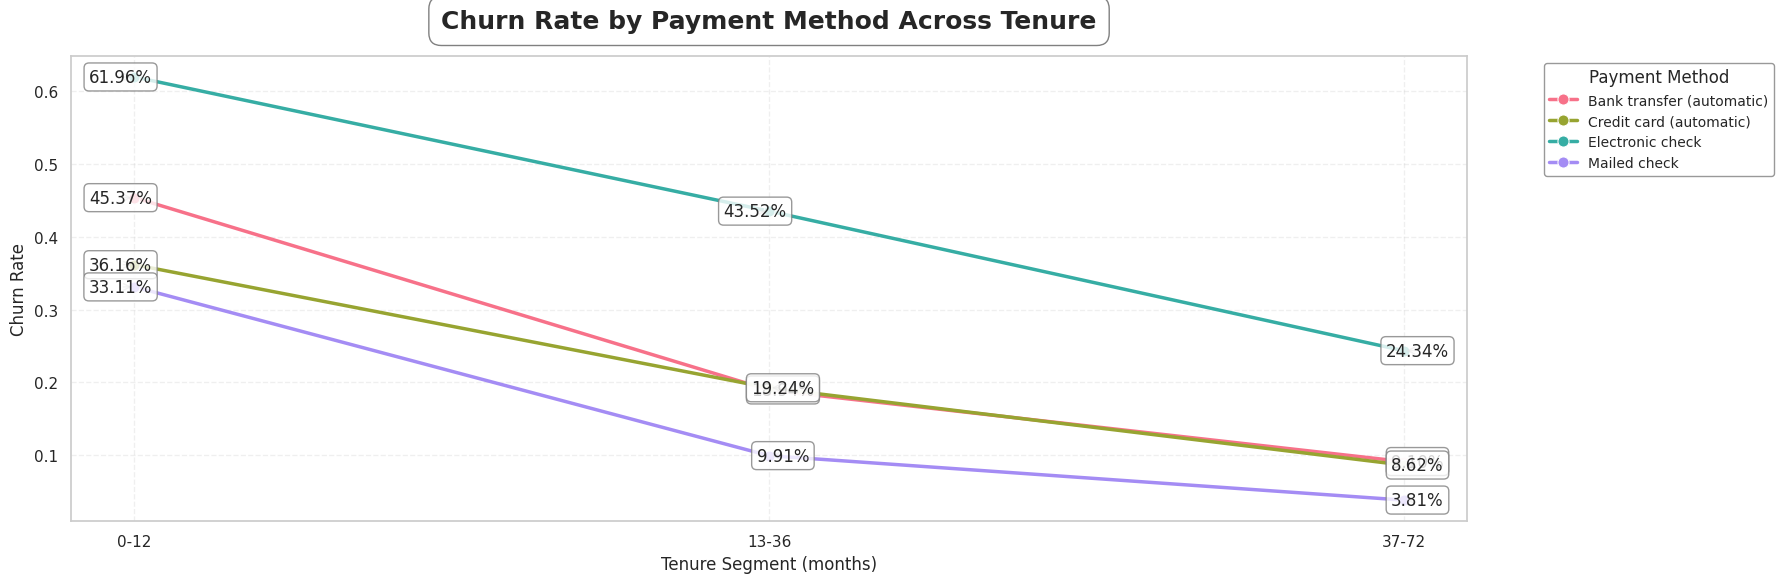

In [134]:
df['TenureSegment'] = pd.cut(df['tenure'], bins=[0, 12, 36, 72], labels=['0-12', '13-36', '37-72'])
payment_tenure_churn = df.groupby(['TenureSegment', 'PaymentMethod'])['Churn'].mean().reset_index()
plt.figure(figsize=(18, 6))

sns.lineplot(x='TenureSegment', y='Churn', hue='PaymentMethod', data=payment_tenure_churn,
             palette='husl', linewidth=2.5, marker='o', markersize=8,
             style='PaymentMethod', dashes=False)

plt.title('Churn Rate by Payment Method Across Tenure', fontsize=18, pad=20, weight='bold',
          bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'))
plt.xlabel('Tenure Segment (months)', fontsize=12)
plt.ylabel('Churn Rate', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.3, zorder=0)
plt.legend(title='Payment Method', title_fontsize=12, fontsize=10,
            bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True, edgecolor='gray')

for i, method in enumerate(payment_tenure_churn['PaymentMethod'].unique()):
    subset = payment_tenure_churn[payment_tenure_churn['PaymentMethod'] == method]
    for x, y in zip(subset['TenureSegment'], subset['Churn']):
        offset_y = 0.02 if y < 0.3 else -0.02
        offset_x = 0.1

        xytext_x = 10 if y < 0.3 else -10
        plt.annotate(f'{y:.2%}', xy=(x, y), xytext=(xytext_x, offset_y),
                     textcoords='offset points', ha='center', va='center',
                     bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round'),
                     arrowprops=dict(arrowstyle='->', connectionstyle='angle3,angleA=0,angleB=-90',
                                     color='gray', alpha=0.5))
plt.tight_layout()
plt.show()

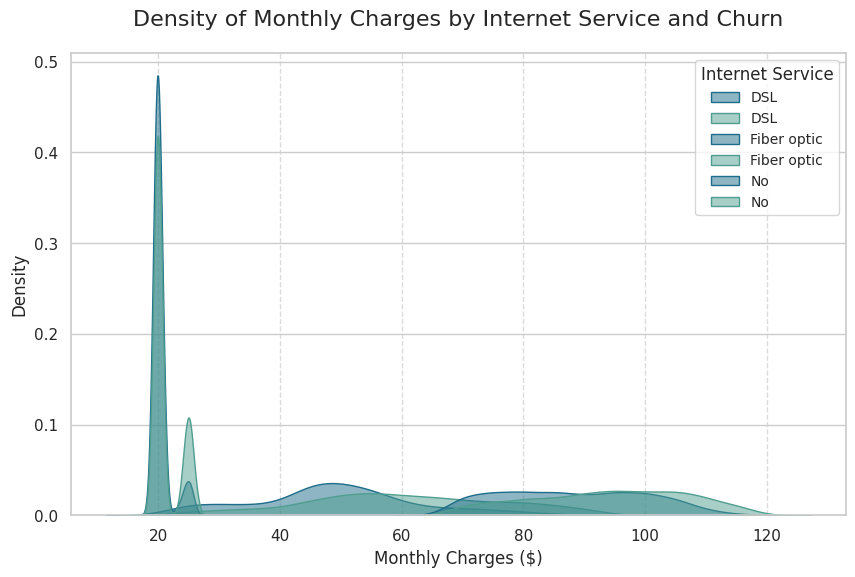

In [135]:
plt.figure(figsize=(10, 6))
for service in df['InternetService'].unique():
    subset = df[df['InternetService'] == service]
    sns.kdeplot(data=subset, x='MonthlyCharges', hue='Churn', fill=True,
                common_norm=False, palette='crest', label=service, alpha=0.5)
plt.title('Density of Monthly Charges by Internet Service and Churn', fontsize=16, pad=20)
plt.xlabel('Monthly Charges ($)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Internet Service', title_fontsize=12, fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

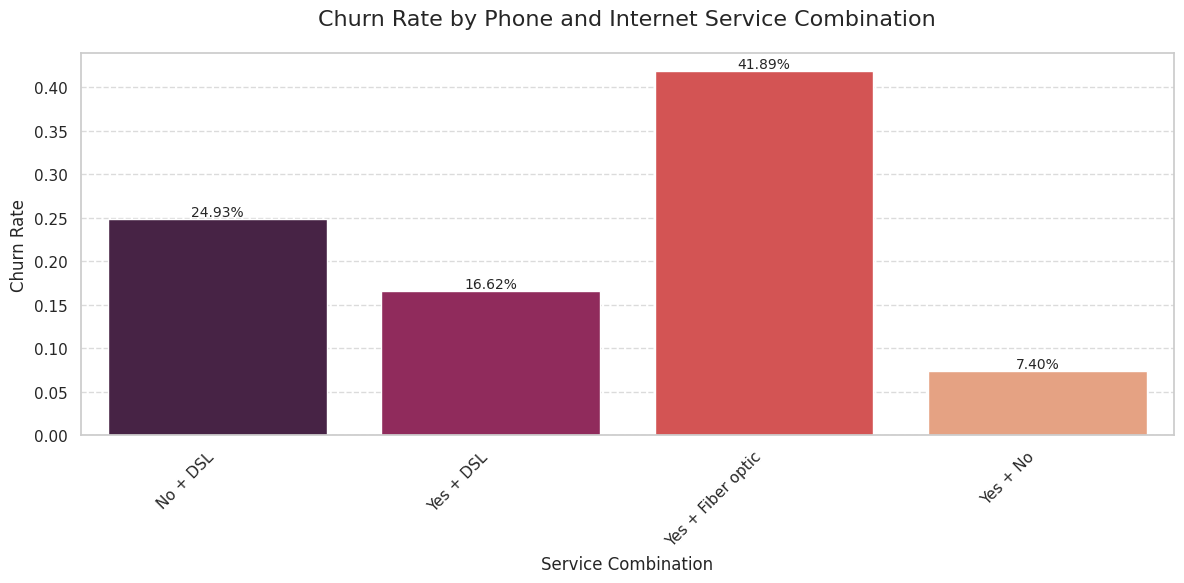

In [136]:
df['PhoneInternetCombo'] = df['PhoneService'].astype(str) + ' + ' + df['InternetService'].astype(str)
combo_churn = df.groupby('PhoneInternetCombo')['Churn'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='PhoneInternetCombo', y='Churn', data=combo_churn, palette='rocket')
plt.title('Churn Rate by Phone and Internet Service Combination', fontsize=16, pad=20)
plt.xlabel('Service Combination', fontsize=12)
plt.ylabel('Churn Rate', fontsize=12)
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(combo_churn['Churn']):
    plt.text(i, v, f'{v:.2%}', ha='center', va='bottom', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

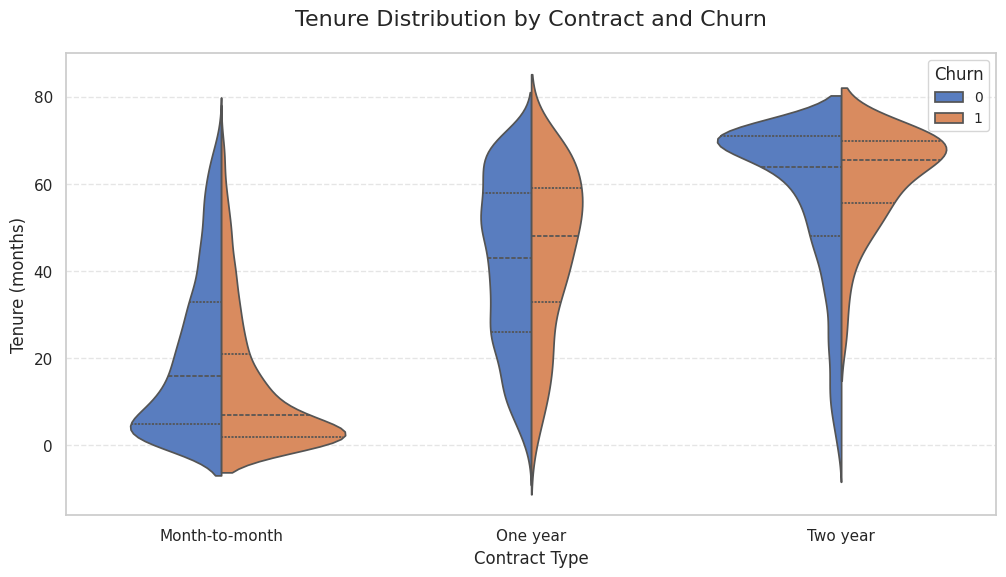

In [137]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Contract', y='tenure', hue='Churn', split=True, data=df, palette='muted', inner='quartile')
plt.title('Tenure Distribution by Contract and Churn', fontsize=16, pad=20)
plt.xlabel('Contract Type', fontsize=12)
plt.ylabel('Tenure (months)', fontsize=12)
plt.legend(title='Churn', title_fontsize=12, fontsize=10, loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

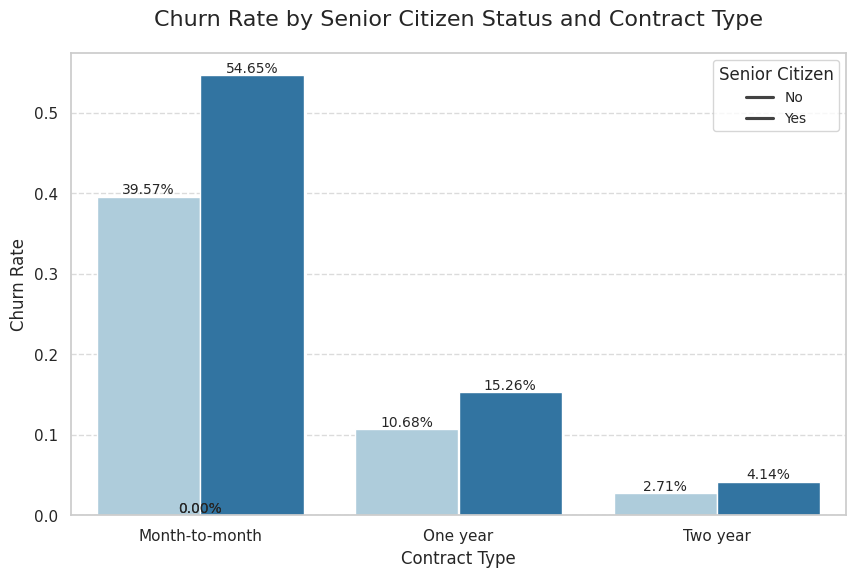

In [138]:
senior_contract_churn = df.groupby(['SeniorCitizen', 'Contract'])['Churn'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Contract', y='Churn', hue='SeniorCitizen', data=senior_contract_churn, palette='Paired')
plt.title('Churn Rate by Senior Citizen Status and Contract Type', fontsize=16, pad=20)
plt.xlabel('Contract Type', fontsize=12)
plt.ylabel('Churn Rate', fontsize=12)
plt.legend(title='Senior Citizen', labels=['No', 'Yes'], title_fontsize=12, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='bottom', fontsize=10)
plt.show()

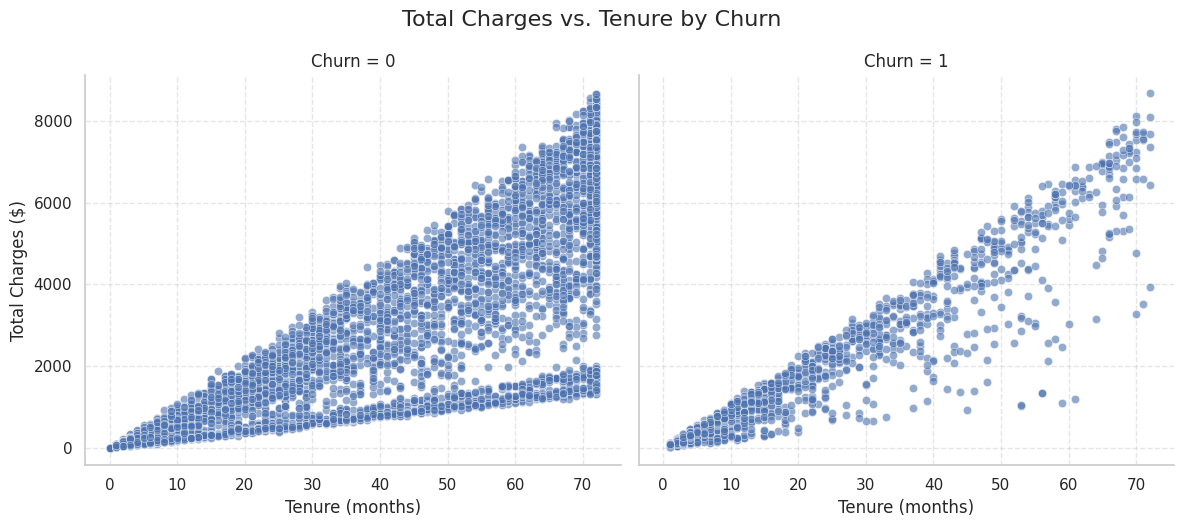

In [139]:
g = sns.FacetGrid(df, col='Churn', height=5, aspect=1.2, col_order=[0, 1])
g.map(sns.scatterplot, 'tenure', 'TotalCharges', alpha=0.6, color=sns.color_palette('deep')[0])
g.set_titles(col_template='Churn = {col_name}', fontsize=14)
g.set_axis_labels('Tenure (months)', 'Total Charges ($)', fontsize=12)
for ax in g.axes.flat:
    ax.grid(True, linestyle='--', alpha=0.5)
plt.suptitle('Total Charges vs. Tenure by Churn', fontsize=16, y=1.05)
plt.show()

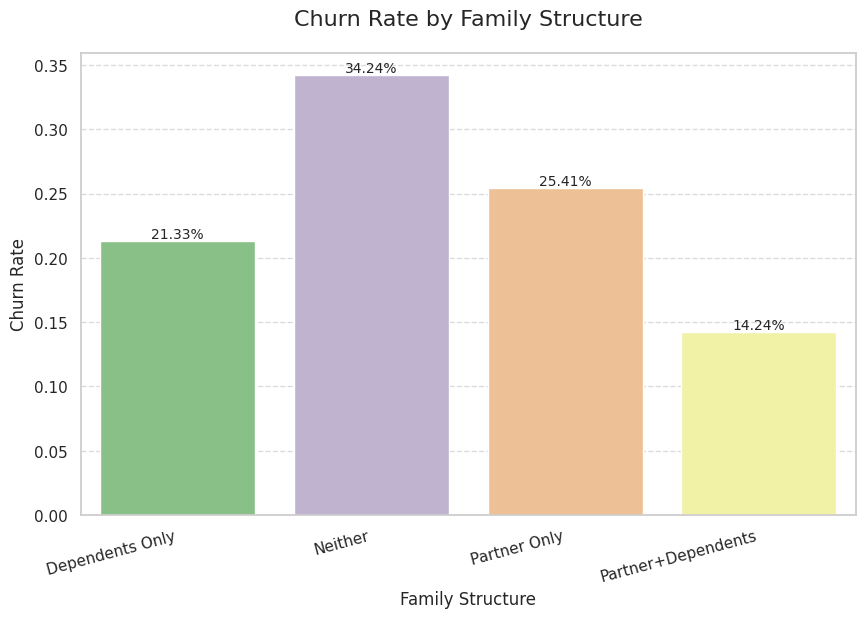

In [140]:
df['FamilyStructure'] = df.apply(lambda x: 'Partner+Dependents' if (x['Partner'] == 'Yes' and x['Dependents'] == 'Yes')
                                 else 'Partner Only' if x['Partner'] == 'Yes'
                                 else 'Dependents Only' if x['Dependents'] == 'Yes'
                                 else 'Neither', axis=1)

family_churn = df.groupby('FamilyStructure')['Churn'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='FamilyStructure', y='Churn', data=family_churn, palette='Accent')
plt.title('Churn Rate by Family Structure', fontsize=16, pad=20)
plt.xlabel('Family Structure', fontsize=12)
plt.ylabel('Churn Rate', fontsize=12)
plt.xticks(rotation=15, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(family_churn['Churn']):
    plt.text(i, v, f'{v:.2%}', ha='center', va='bottom', fontsize=10)
plt.show()

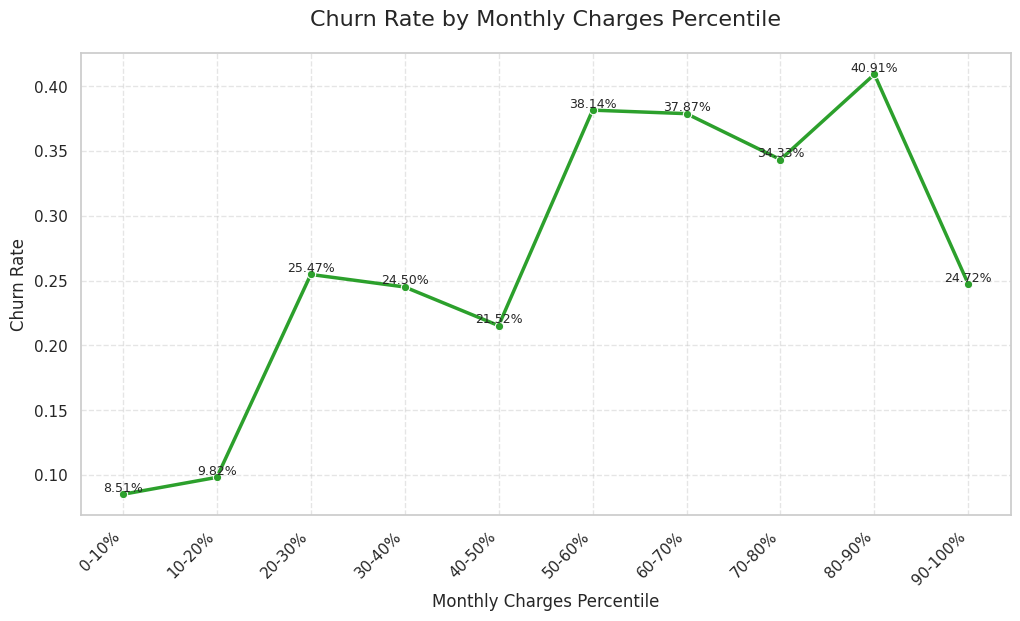

In [141]:
df['ChargePercentile'] = pd.qcut(df['MonthlyCharges'], q=10, labels=[f'{i*10}-{(i+1)*10}%' for i in range(10)])
charge_percentile_churn = df.groupby('ChargePercentile')['Churn'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=charge_percentile_churn.index, y=charge_percentile_churn.values, marker='o', color=sns.color_palette('tab10')[2], linewidth=2.5)
plt.title('Churn Rate by Monthly Charges Percentile', fontsize=16, pad=20)
plt.xlabel('Monthly Charges Percentile', fontsize=12)
plt.ylabel('Churn Rate', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.5)
for x, y in zip(charge_percentile_churn.index, charge_percentile_churn.values):
    plt.text(x, y, f'{y:.2%}', ha='center', va='bottom', fontsize=9)
plt.show()

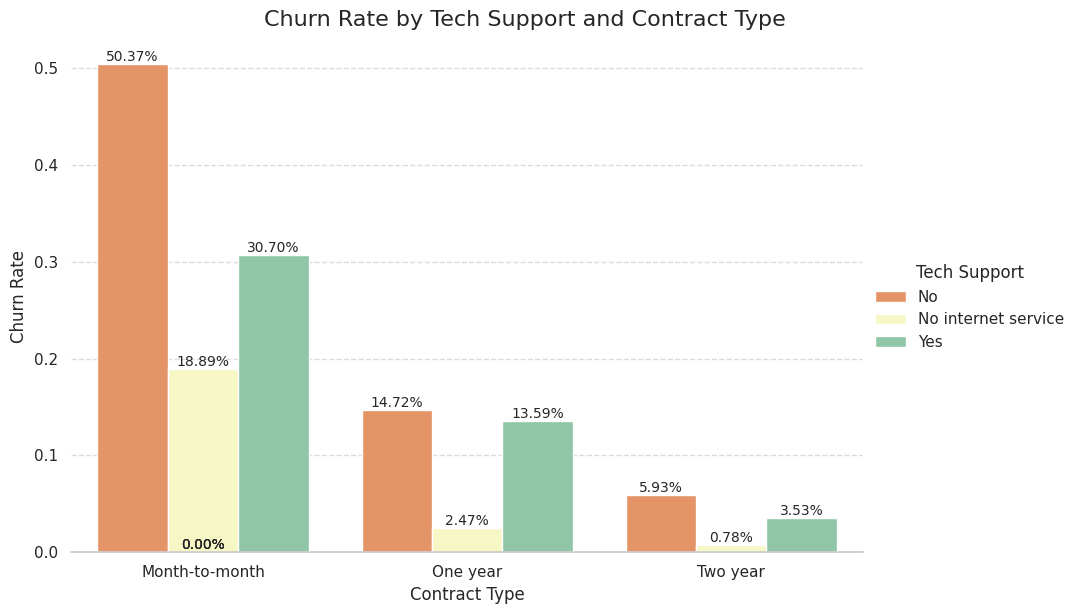

In [142]:
tech_contract_churn = df.groupby(['TechSupport', 'Contract'])['Churn'].mean().reset_index()

g = sns.catplot(x='Contract', y='Churn', hue='TechSupport', data=tech_contract_churn, kind='bar',
            palette='Spectral', height=6, aspect=1.5)
g.fig.suptitle('Churn Rate by Tech Support and Contract Type', fontsize=16, y=1.02)

g.set_axis_labels('Contract Type', 'Churn Rate', fontsize=12)
g.set_titles("{col_name}", fontsize=14)
g.despine(left=True)
g.legend.set_title('Tech Support')

ax = g.axes.flat[0]
ax.grid(axis='y', linestyle='--', alpha=0.7)
for p in ax.patches:
    height = p.get_height()
    if not np.isnan(height):
        ax.annotate(f'{height:.2%}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10)

plt.show()

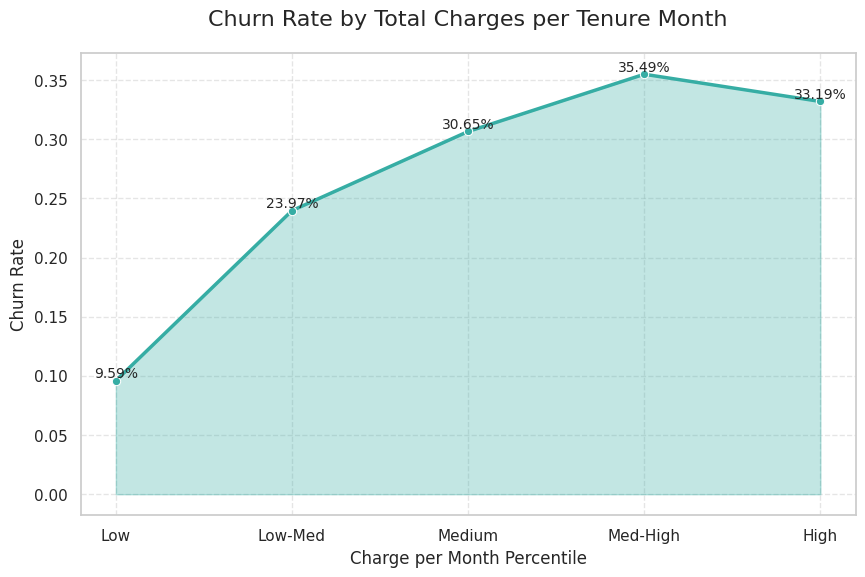

In [143]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['ChargePerMonth'] = df['TotalCharges'] / df['tenure'].replace(0, np.nan)
df['ChargePerMonthBin'] = pd.qcut(df['ChargePerMonth'].dropna(), q=5, labels=['Low', 'Low-Med', 'Medium', 'Med-High', 'High'])
charge_ratio_churn = df.groupby('ChargePerMonthBin')['Churn'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=charge_ratio_churn.index, y=charge_ratio_churn.values, marker='o',
             color=sns.color_palette('husl')[3], linewidth=2.5)
plt.fill_between(charge_ratio_churn.index, charge_ratio_churn.values, alpha=0.3,
                 color=sns.color_palette('husl')[3])
plt.title('Churn Rate by Total Charges per Tenure Month', fontsize=16, pad=20)
plt.xlabel('Charge per Month Percentile', fontsize=12)
plt.ylabel('Churn Rate', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
for x, y in zip(charge_ratio_churn.index, charge_ratio_churn.values):
    plt.text(x, y, f'{y:.2%}', ha='center', va='bottom', fontsize=10)
plt.show()

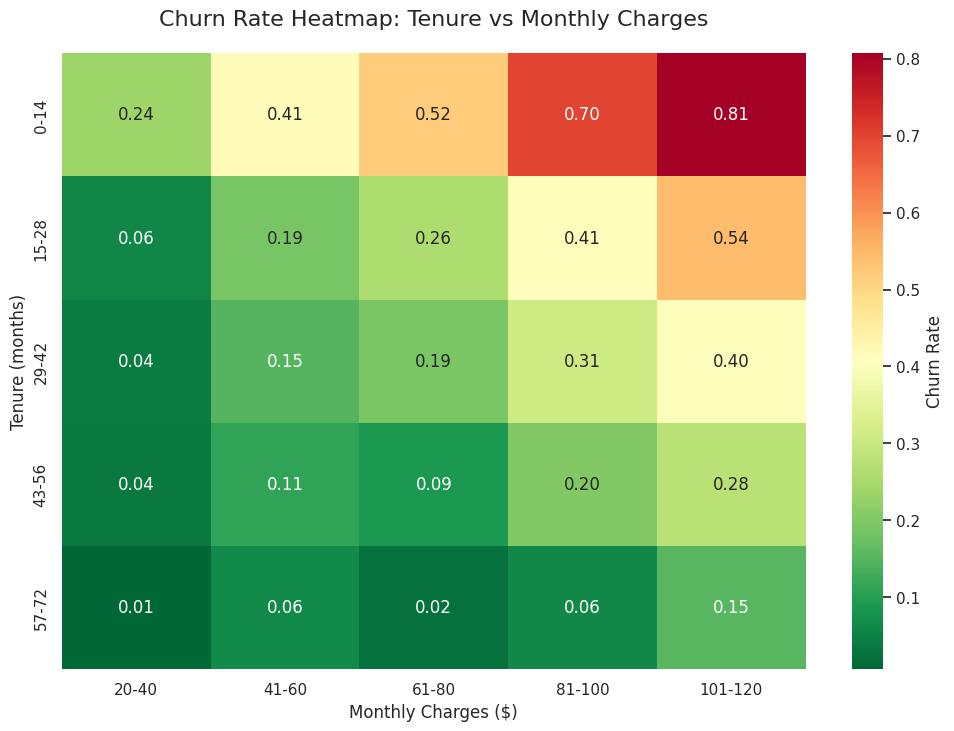

In [144]:
df['TenureBin'] = pd.cut(df['tenure'], bins=5, labels=['0-14', '15-28', '29-42', '43-56', '57-72'])
df['ChargesBin'] = pd.cut(df['MonthlyCharges'], bins=5, labels=['20-40', '41-60', '61-80', '81-100', '101-120'])
tenure_charge_churn = df.groupby(['TenureBin', 'ChargesBin'])['Churn'].mean().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(tenure_charge_churn, annot=True, cmap='RdYlGn_r', fmt='.2f', cbar_kws={'label': 'Churn Rate'})
plt.title('Churn Rate Heatmap: Tenure vs Monthly Charges', fontsize=16, pad=20)
plt.xlabel('Monthly Charges ($)', fontsize=12)
plt.ylabel('Tenure (months)', fontsize=12)
plt.show()

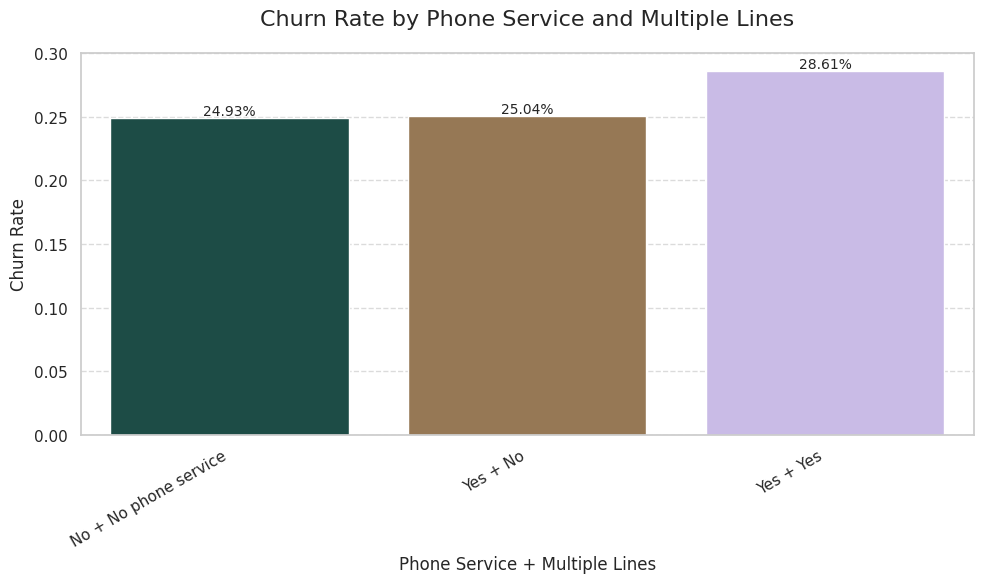

In [145]:
df['PhoneLinesCombo'] = df.apply(lambda x: f"{x['PhoneService']} + {x['MultipleLines']}", axis=1)
phone_lines_churn = df.groupby('PhoneLinesCombo')['Churn'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='PhoneLinesCombo', y='Churn', data=phone_lines_churn, palette='cubehelix')
plt.title('Churn Rate by Phone Service and Multiple Lines', fontsize=16, pad=20)
plt.xlabel('Phone Service + Multiple Lines', fontsize=12)
plt.ylabel('Churn Rate', fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(phone_lines_churn['Churn']):
    plt.text(i, v, f'{v:.2%}', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

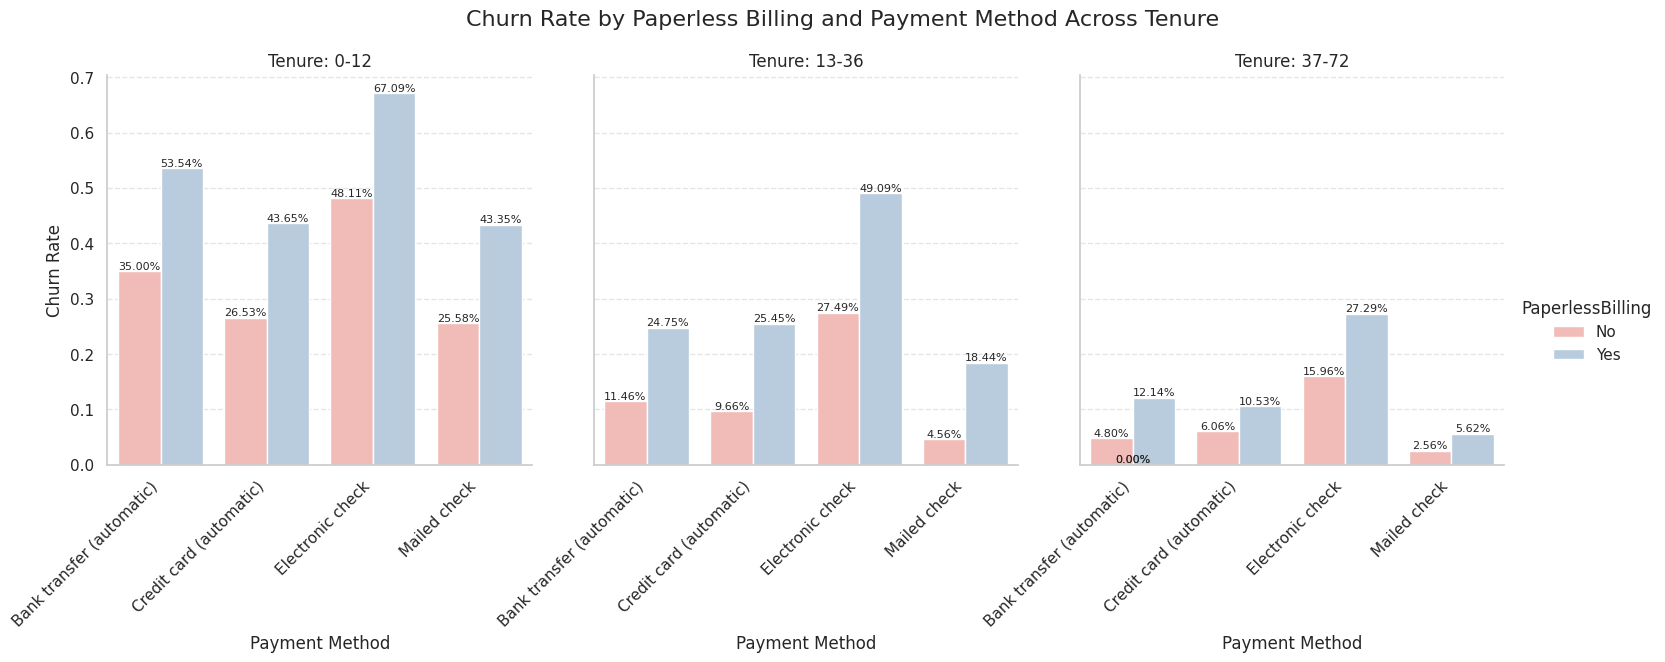

In [146]:
df['TenureSegment'] = pd.cut(df['tenure'], bins=[0, 12, 36, 72], labels=['0-12', '13-36', '37-72'])
paperless_payment_churn = df.groupby(['TenureSegment', 'PaperlessBilling', 'PaymentMethod'])['Churn'].mean().reset_index()

g = sns.catplot(x='PaymentMethod', y='Churn', hue='PaperlessBilling', col='TenureSegment', data=paperless_payment_churn,
                kind='bar', palette='Pastel1', height=5, aspect=1)
g.set_titles('Tenure: {col_name}', fontsize=14)
g.set_axis_labels('Payment Method', 'Churn Rate', fontsize=12)
g.fig.suptitle('Churn Rate by Paperless Billing and Payment Method Across Tenure', fontsize=16, y=1.05)
for ax in g.axes.flat:
    for p in ax.patches:
        height = p.get_height()
        if not np.isnan(height):
            ax.annotate(f'{height:.2%}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=8)
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    xticks = ax.get_xticks()
    ax.set_xticks(xticks)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

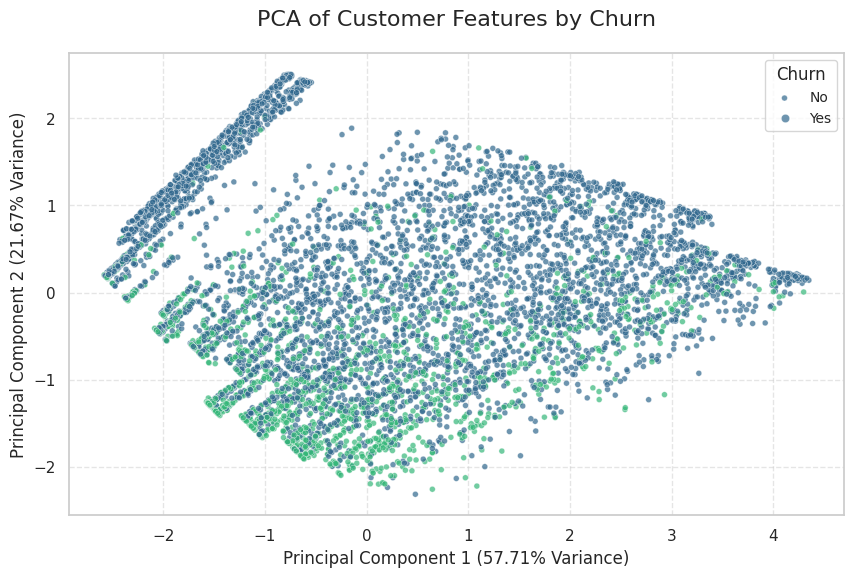

Explained Variance Ratio: [0.5770791 0.2167034]


In [147]:
data_for_pca = df[features].dropna()
numerical_features = data_for_pca.select_dtypes(include=np.number).columns.tolist()
categorical_features = data_for_pca.select_dtypes(include=['object', 'category']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)])  # sparse=False for PCA

data_scaled = preprocessor.fit_transform(data_for_pca)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)

df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
df_pca['Churn'] = df['Churn'].loc[data_for_pca.index]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Churn', data=df_pca, palette='viridis', alpha=0.7, size=100)
plt.title('PCA of Customer Features by Churn', fontsize=16, pad=20)
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} Variance)', fontsize=12)
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} Variance)', fontsize=12)
plt.legend(title='Churn', title_fontsize=12, fontsize=10, labels=['No', 'Yes'])
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

print("Explained Variance Ratio:", pca.explained_variance_ratio_)

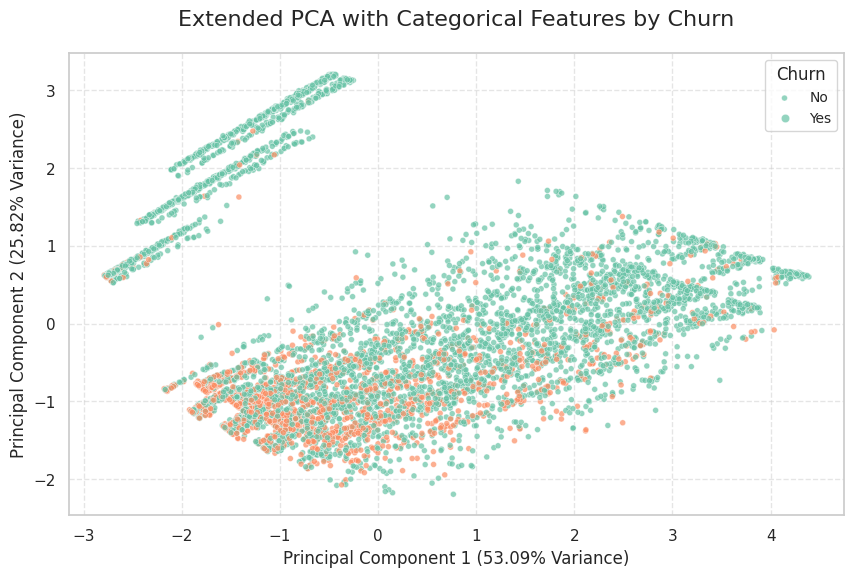

In [148]:
extended_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'NumAddons', 'Contract', 'InternetService']
data_extended = df[extended_features].dropna()

le = LabelEncoder()
data_extended['Contract'] = le.fit_transform(data_extended['Contract'])
data_extended['InternetService'] = le.fit_transform(data_extended['InternetService'])

data_scaled_ext = scaler.fit_transform(data_extended)
pca_ext = PCA(n_components=2)
pca_ext_result = pca_ext.fit_transform(data_scaled_ext)

df_pca_ext = pd.DataFrame(pca_ext_result, columns=['PC1', 'PC2'])
df_pca_ext['Churn'] = df['Churn'].loc[data_extended.index]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Churn', data=df_pca_ext, palette='Set2', alpha=0.7, size=100)
plt.title('Extended PCA with Categorical Features by Churn', fontsize=16, pad=20)
plt.xlabel(f'Principal Component 1 ({pca_ext.explained_variance_ratio_[0]:.2%} Variance)', fontsize=12)
plt.ylabel(f'Principal Component 2 ({pca_ext.explained_variance_ratio_[1]:.2%} Variance)', fontsize=12)
plt.legend(title='Churn', title_fontsize=12, fontsize=10, labels=['No', 'Yes'])
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

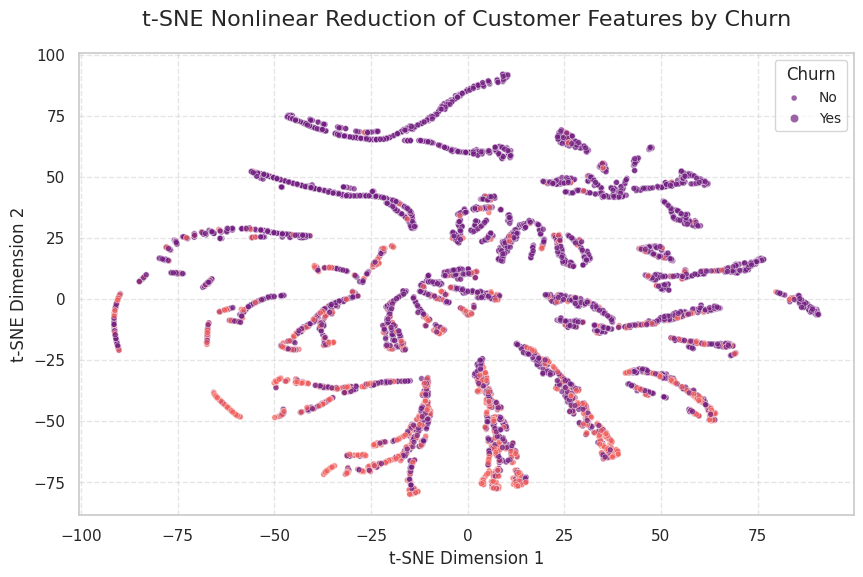

In [166]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)])

data_tsne = preprocessor.fit_transform(data_for_pca)
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_result = tsne.fit_transform(data_tsne)

df_tsne = pd.DataFrame(tsne_result, columns=['t-SNE1', 't-SNE2'])
df_tsne['Churn'] = df['Churn'].loc[data_for_pca.index]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='t-SNE1', y='t-SNE2', hue='Churn', data=df_tsne, palette='magma', alpha=0.7, size=100)
plt.title('t-SNE Nonlinear Reduction of Customer Features by Churn', fontsize=16, pad=20)
plt.xlabel('t-SNE Dimension 1', fontsize=12)
plt.ylabel('t-SNE Dimension 2', fontsize=12)
plt.legend(title='Churn', title_fontsize=12, fontsize=10, labels=['No', 'Yes'])
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

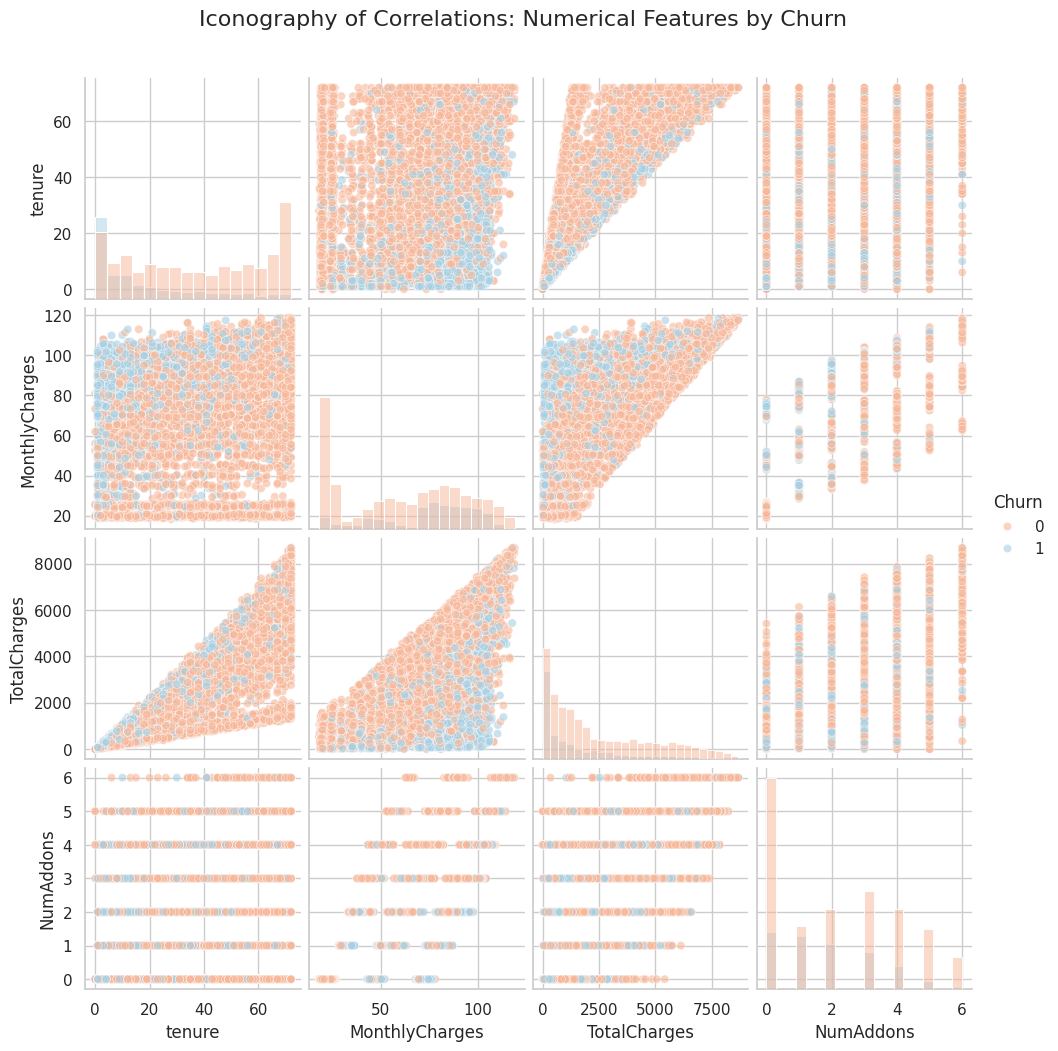

In [154]:
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'NumAddons']

sns.pairplot(data_corr, hue='Churn', palette='RdBu', diag_kind='hist', plot_kws={'alpha': 0.6})
plt.suptitle('Iconography of Correlations: Numerical Features by Churn', fontsize=16, y=1.05)
plt.show()